In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# setup disply parameters
from matplotlib import pylab as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter
float_formatter = StrMethodFormatter('{x:0.03f}')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('figure', figsize=(18, 6)) # set figure size
plt.rc("animation", html="html5")
import random
random.seed(203)
import numpy as np
np.random.seed(345)
from rich import print

## Visualizing preference profiles
In ANL 2024, different types of scenarios are used, see [the detailed description](http://tinyurl.com/ANAC2024docs) of ANL 2024 for more information. In this notebook, we will provide some code to visualize the different types.

In [5]:
from negmas import SAOMechanism
from anl.anl2024 import zerosum_pie_scenarios, monotonic_pie_scenarios, arbitrary_pie_scenarios

scenario = monotonic_pie_scenarios(n_scenarios=2, n_outcomes=20)[0] #zerosum_pie_scenarios, arbitrary_pie_scenarios
session = SAOMechanism(issues=scenario.issues, n_steps=30)
A_utility = scenario.ufuns[0]
B_utility = scenario.ufuns[1]
#visualize((session, A_utility, B_utility))


In the first line, we generate a `monotonic_pie_scenario` (or actually 2), which is one of three types of scenarios. The other two are  `zerosum_pie_scenarios` and `arbitrary_pie_scenarios`. After extracting the corresponding utility functions, we can visualize the session in the same way we did in the previous notebook (running a negotiation).

For completeness, we provide the code for the `visualize` function below. By removing the `session.run` statement, it is possible to see the scenario plotted, without a negotiation taking place. This is useful to see the shape of the scenario, and to understand the preferences of the agents.


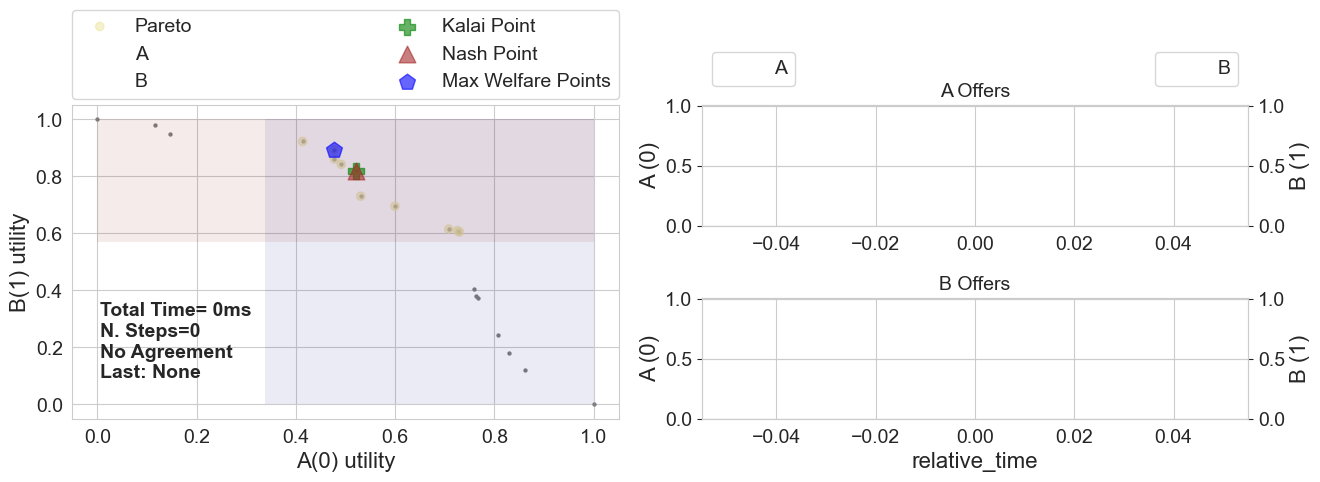

In [6]:
from anl.anl2024.negotiators import Conceder, Boulware

def visualize(negotiation_setup):
    (session, A_utility, B_utility) = negotiation_setup

    # create and add selller and buyer to the session
    AgentA = Boulware(name="A")
    AgentB = Boulware(name="B")
    session.add(AgentA, ufun=A_utility)
    session.add(AgentB, ufun=B_utility)

    # run the negotiation and show the results
    # session.run()

    session.plot(ylimits=(0.0, 1.01), show_reserved=True)
    plt.show()

visualize((session, A_utility, B_utility))